In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
url="/content/drive/MyDrive/EV_market_segmentation/Datasets/electric_bikes_F.csv"
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Bike Name,Price,Range,Kwh,Range_per_charge,Max_speed
0,0,Ola S1 Pro,Rs. 1.29 Lakh,4 Kwh | 195 km/charge | 120 km/Hr,4 Kwh,195 km/charge,120 km/Hr
1,1,TVS iQube,Rs. 1.17 Lakh,3.4 Kwh | 100 km/charge | 78 km/Hr,3.4 Kwh,100 km/charge,78 km/Hr
2,2,Ather 450X,Rs. 1.25 - 1.28 Lakh,3.7 Kwh | 150 km/charge | 90 km/Hr,3.7 Kwh,150 km/charge,90 km/Hr
3,3,Bajaj Chetak,Rs. 1.15 - 1.44 Lakh,3.2 Kwh | 127 km/charge | 73 km/Hr,3.2 Kwh,127 km/charge,73 km/Hr
4,4,Ola S1 X,"Rs. 79,999 - 1.09 Lakh",2 Kwh | 95 km/charge | 85 km/Hr,2 Kwh,95 km/charge,85 km/Hr


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        384 non-null    int64 
 1   Bike Name         384 non-null    object
 2   Price             384 non-null    object
 3   Range             373 non-null    object
 4   Kwh               373 non-null    object
 5   Range_per_charge  340 non-null    object
 6   Max_speed         236 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.1+ KB


In [167]:
data=data.drop(columns=['Range'])

In [168]:
for i in range(data.shape[0]):
    data.loc[i, 'Price'] = data.loc[i, 'Price'][4:]


data.head()

,Unnamed: 0,Bike Name,Price,Kwh,Range_per_charge,Max_speed
0,0,Ola S1 Pro,1.29 Lakh,4 Kwh,195 km/charge,120 km/Hr
1,1,TVS iQube,1.17 Lakh,3.4 Kwh,100 km/charge,78 km/Hr
2,2,Ather 450X,1.25 - 1.28 Lakh,3.7 Kwh,150 km/charge,90 km/Hr
3,3,Bajaj Chetak,1.15 - 1.44 Lakh,3.2 Kwh,127 km/charge,73 km/Hr
4,4,Ola S1 X,"79,999 - 1.09 Lakh",2 Kwh,95 km/charge,85 km/Hr


In [169]:
def normalize_price(price):
    if 'Lakh' in price:
      price = price[:-4]
    if '-' in price:
        # Split the range and take the maximum value
        prices = price.split('-')
        price = max(float(p.strip().replace(',', '')) for p in prices)
    elif 'Lakh' in price:
        # Convert lakhs to units of 10000
        price = float(price.replace('Lakh', '').replace(',', '').strip()) * 10000
    else:
        price = float(price.strip().replace(',', ''))
    return price



# Apply the normalization function to the price column
data['Price'] = data['Price'].apply(normalize_price)

In [170]:
data['Kwh'] = data['Kwh'].replace(to_replace=r'^(?!.*Kwh).*$', value=pd.NA, regex=True)

In [171]:
data.head()

,Unnamed: 0,Bike Name,Price,Kwh,Range_per_charge,Max_speed
0,0,Ola S1 Pro,1.29,4 Kwh,195 km/charge,120 km/Hr
1,1,TVS iQube,1.17,3.4 Kwh,100 km/charge,78 km/Hr
2,2,Ather 450X,1.28,3.7 Kwh,150 km/charge,90 km/Hr
3,3,Bajaj Chetak,1.44,3.2 Kwh,127 km/charge,73 km/Hr
4,4,Ola S1 X,79999.00,2 Kwh,95 km/charge,85 km/Hr


In [172]:
for i in range(data.shape[0]):
    data.loc[i, 'Kwh'] = str(data.loc[i, 'Kwh'])
    data.loc[i, 'Kwh'] = data.loc[i, 'Kwh'][:-3]

data.head()

,Unnamed: 0,Bike Name,Price,Kwh,Range_per_charge,Max_speed
0,0,Ola S1 Pro,1.29,4,195 km/charge,120 km/Hr
1,1,TVS iQube,1.17,3.4,100 km/charge,78 km/Hr
2,2,Ather 450X,1.28,3.7,150 km/charge,90 km/Hr
3,3,Bajaj Chetak,1.44,3.2,127 km/charge,73 km/Hr
4,4,Ola S1 X,79999.00,2,95 km/charge,85 km/Hr


In [173]:
for i in range(data.shape[0]):
    if float(data.loc[i, 'Price'])/10<1:
      data.loc[i, 'Price'] = data.loc[i, 'Price']*100000

data.head()

for i in range(data.shape[0]):
    if '<' in data.loc[i, 'Kwh']:
      data.loc[i, 'Kwh'] = pd.NA

In [174]:
data['Range_per_charge'] = data['Range_per_charge'].replace(to_replace=r'^(?!.*km/charge).*$', value=pd.NA, regex=True)

In [175]:
for i in range(data.shape[0]):
    data.loc[i, 'Range_per_charge'] = str(data.loc[i, 'Range_per_charge'])
    data.loc[i, 'Range_per_charge'] = data.loc[i, 'Range_per_charge'][:-10]

In [176]:
data.head()

,Unnamed: 0,Bike Name,Price,Kwh,Range_per_charge,Max_speed
0,0,Ola S1 Pro,129000.0,4,195,120 km/Hr
1,1,TVS iQube,117000.0,3.4,100,78 km/Hr
2,2,Ather 450X,128000.0,3.7,150,90 km/Hr
3,3,Bajaj Chetak,144000.0,3.2,127,73 km/Hr
4,4,Ola S1 X,79999.0,2,95,85 km/Hr


In [178]:
def normalize_range(range):
    if '-' in range:
        # Split the range and take the maximum value
        range = range.split('-')
        range = max(float(r.strip().replace(',', '')) for r in range)
    return range

data['Range_per_charge'] = data['Range_per_cha'].apply(normalize_range)

In [183]:

data['Kwh'] = pd.to_numeric(data['Kwh'], errors='coerce')
data['Range_per_charge'] = pd.to_numeric(data['Range_per_charge'], errors='coerce')

In [184]:
data.to_csv('EV_Bike_data.csv', index=False)

In [186]:
data = data.drop(columns=['Max_speed'])

In [192]:
data = data.dropna()

In [194]:
data.shape

(121, 5)

In [187]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [198]:
x = data.iloc[:, 2:].values

sc = StandardScaler()
x = sc.fit_transform(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

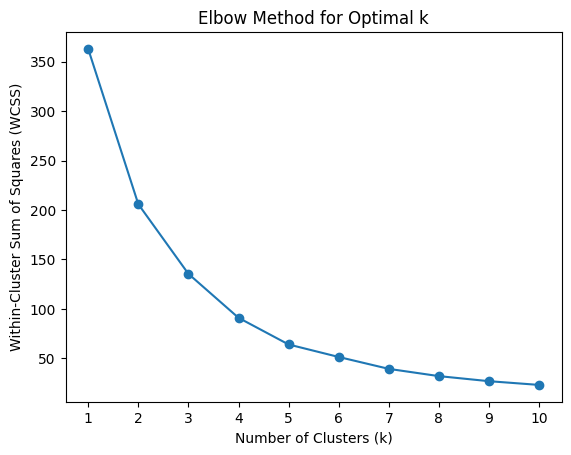

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range(1, 11)

wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


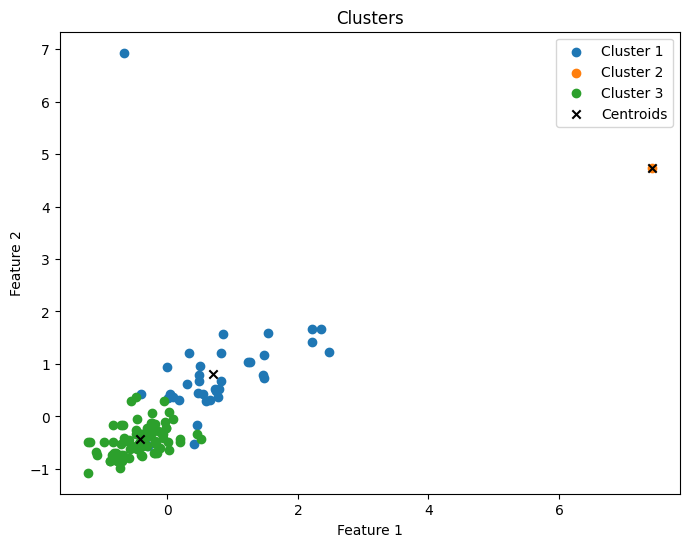

In [204]:
import pandas as pd
from sklearn.cluster import KMeans


k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(x)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

data['Cluster'] = labels

data.to_excel('clustered_data.xlsx', index=False)

plt.figure(figsize=(8, 6))

# Scatter plot each cluster
for cluster_label in range(k):
    plt.scatter(x[labels == cluster_label, 0], x[labels == cluster_label, 1], label=f'Cluster {cluster_label + 1}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroids')

plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()